# What is a Convolutional Neural Network?

It's a neural network with one more more convolutional *layers*.

# What is a Convolutional Layer?

It's a layer in a neural network that utilizes *convolution*.

# What is Convolution?

![2D Convolution](https://i.stack.imgur.com/I7DBr.gif3)

### Mathematical Definition

$$
(I \star F)[x, y] = \sum_{i = -1}^1 \sum_{j = -1}^1 I[x+i, y+j] * F[i, j]
$$

![winter1516_lecture7 10](images/winter1516_lecture7 10.png)

![winter1516_lecture7 11](images/winter1516_lecture7 11.png)

![winter1516_lecture7 12](images/winter1516_lecture7 12.png)

![winter1516_lecture7 13](images/winter1516_lecture7 13.png)

![winter1516_lecture7 14](images/winter1516_lecture7 14.png)

![winter1516_lecture7 15](images/winter1516_lecture7 15.png)

![winter1516_lecture7 16](images/winter1516_lecture7 16.png)

In [23]:
from IPython.display import display
import pickle
import numpy as np
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Model
from keras.applications.vgg16 import preprocess_input

imgs, y = pickle.load(open('data/CatsVDogs.p', 'rb'))
img = imgs[1].resize(size=[224, 224])
x = img_to_array(img)
X = np.expand_dims(x, axis=0)
X = preprocess_input(X)

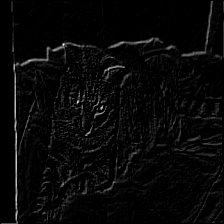

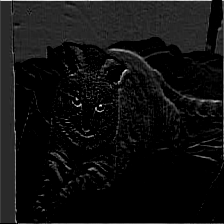

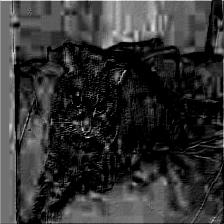

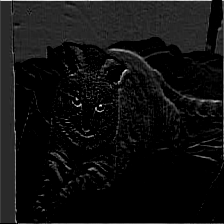

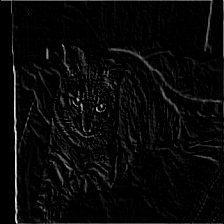

In [26]:
from keras.applications import VGG16

vggnet = VGG16()
model = Model(inputs=vggnet.inputs, outputs=vggnet.get_layer('block1_conv1').output)
A = model.predict(X)[0]

display(img)

nb_filter = A.shape[-1]
for idx in np.random.choice(nb_filter, size=4):
    a = A[..., idx]
    img = array_to_img(np.expand_dims(a, axis=-1))
    display(img)

![winter1516_lecture7 17](images/winter1516_lecture7 17.png)

![winter1516_lecture7 18](images/winter1516_lecture7 18.png)

![winter1516_lecture7 19](images/winter1516_lecture7 19.png)

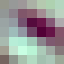

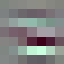

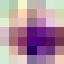

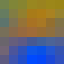

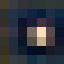

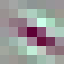

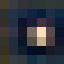

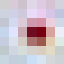

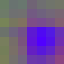

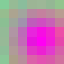

In [31]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import array_to_img

resnet = ResNet50()
W, b = resnet.get_layer('conv1').get_weights()

nb_filter = W.shape[-1]
for filter_idx in np.random.choice(nb_filter, size=10):
    w = W[..., filter_idx]
    filter = array_to_img(w).resize(size=[64, 64])
    display(filter)

![winter1516_lecture7 20](images/winter1516_lecture7 20.png)

![winter1516_lecture7 21](images/winter1516_lecture7 21.png)

![winter1516_lecture7 22](images/winter1516_lecture7 22.png)

![winter1516_lecture7 23](images/winter1516_lecture7 23.png)

In [32]:
from keras.layers import Input, Convolution2D
from keras.models import Model

x = Input(shape=[32, 32, 3], name='image')
a = Convolution2D(filters=1, kernel_size=5, name='convolution2d')(x)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 32, 32, 3)             0       
___________________________________________________________________________
convolution2d (Conv2D)               (None, 28, 28, 1)             76      
Total params: 76.0
Trainable params: 76.0
Non-trainable params: 0.0
___________________________________________________________________________


![winter1516_lecture7 24](images/winter1516_lecture7 24.png)

![winter1516_lecture7 25](images/winter1516_lecture7 25.png)

![winter1516_lecture7 26](images/winter1516_lecture7 26.png)

![winter1516_lecture7 27](images/winter1516_lecture7 27.png)

![winter1516_lecture7 28](images/winter1516_lecture7 28.png)

In [34]:
from keras.layers import Input, Convolution2D
from keras.models import Model

x = Input(shape=[7, 7, 1], name='image')
a = Convolution2D(filters=1, kernel_size=3, name='convolution')(x)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 7, 7, 1)               0       
___________________________________________________________________________
convolution (Conv2D)                 (None, 5, 5, 1)               10      
Total params: 10.0
Trainable params: 10.0
Non-trainable params: 0.0
___________________________________________________________________________


![winter1516_lecture7 29](images/winter1516_lecture7 29.png)

![winter1516_lecture7 30](images/winter1516_lecture7 30.png)

![winter1516_lecture7 31](images/winter1516_lecture7 31.png)

In [36]:
from keras.layers import Input, Convolution2D
from keras.models import Model

x = Input(shape=[7, 7, 1], name='image')
a = Convolution2D(filters=1, kernel_size=3, strides=[2, 2], name='convolution')(x)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 7, 7, 1)               0       
___________________________________________________________________________
convolution (Conv2D)                 (None, 3, 3, 1)               10      
Total params: 10.0
Trainable params: 10.0
Non-trainable params: 0.0
___________________________________________________________________________


![winter1516_lecture7 32](images/winter1516_lecture7 32.png)

![winter1516_lecture7 33](images/winter1516_lecture7 33.png)

In [37]:
from keras.layers import Input, Convolution2D
from keras.models import Model

x = Input(shape=[7, 7, 1], name='image')
a = Convolution2D(filters=1, kernel_size=3, strides=[3, 3], name='convolution')(x)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 7, 7, 1)               0       
___________________________________________________________________________
convolution (Conv2D)                 (None, 2, 2, 1)               10      
Total params: 10.0
Trainable params: 10.0
Non-trainable params: 0.0
___________________________________________________________________________


![winter1516_lecture7 34](images/winter1516_lecture7 34.png)

![winter1516_lecture7 35](images/winter1516_lecture7 35.png)

![winter1516_lecture7 36](images/winter1516_lecture7 36.png)

In [38]:
from keras.layers import Input, ZeroPadding2D, Convolution2D
from keras.models import Model

x = Input(shape=[7, 7, 1], name='image')
x_padded = ZeroPadding2D(padding=[1, 1], name='image_padded')(x)
a = Convolution2D(filters=1, kernel_size=3, name='image_convolved')(x_padded)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 7, 7, 1)               0       
___________________________________________________________________________
image_padded (ZeroPadding2D)         (None, 9, 9, 1)               0       
___________________________________________________________________________
image_convolved (Conv2D)             (None, 7, 7, 1)               10      
Total params: 10.0
Trainable params: 10.0
Non-trainable params: 0.0
___________________________________________________________________________


### Without Zero-Padding

In [39]:
from keras.layers import Input, Convolution2D
from keras.models import Model

x = Input(shape=[7, 7, 1], name='image')
a = Convolution2D(filters=1, kernel_size=3, border_mode='valid', name='convolution')(x)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 7, 7, 1)               0       
___________________________________________________________________________
convolution (Conv2D)                 (None, 5, 5, 1)               10      
Total params: 10.0
Trainable params: 10.0
Non-trainable params: 0.0
___________________________________________________________________________


/Users/edward.banner/.anaconda/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=1, kernel_size=3, name="convolution", padding="valid")`


### `keras` Will Figure it out Automatically With `border_mode='same'`

In [41]:
from keras.layers import Input, Convolution2D
from keras.models import Model

x = Input(shape=[7, 7, 1], name='image')
a = Convolution2D(filters=1, kernel_size=3, border_mode='same', name='convolution')(x)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 7, 7, 1)               0       
___________________________________________________________________________
convolution (Conv2D)                 (None, 7, 7, 1)               10      
Total params: 10.0
Trainable params: 10.0
Non-trainable params: 0.0
___________________________________________________________________________


/Users/edward.banner/.anaconda/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=1, kernel_size=3, name="convolution", padding="same")`


![winter1516_lecture7 37](images/winter1516_lecture7 37.png)

![winter1516_lecture7 38](images/winter1516_lecture7 38.png)

![winter1516_lecture7 39](images/winter1516_lecture7 39.png)

![winter1516_lecture7 40](images/winter1516_lecture7 40.png)

In [42]:
from keras.layers import Input, ZeroPadding2D, Convolution2D
from keras.models import Model

x = Input(shape=[32, 32, 3], name='image')
x_padded = ZeroPadding2D(padding=[2, 2], name='image_padded')(x)
a = Convolution2D(filters=10, kernel_size=5, name='convolution')(x_padded)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 32, 32, 3)             0       
___________________________________________________________________________
image_padded (ZeroPadding2D)         (None, 36, 36, 3)             0       
___________________________________________________________________________
convolution (Conv2D)                 (None, 32, 32, 10)            760     
Total params: 760.0
Trainable params: 760.0
Non-trainable params: 0.0
___________________________________________________________________________


![winter1516_lecture7 41](images/winter1516_lecture7 41.png)

![winter1516_lecture7 42](images/winter1516_lecture7 42.png)

In [43]:
from keras.layers import Input, ZeroPadding2D, Convolution2D
from keras.models import Model

x = Input(shape=[32, 32, 3], name='image')
x_padded = ZeroPadding2D(padding=[2, 2], name='image_padded')(x)
a = Convolution2D(filters=10, kernel_size=5, name='convolution')(x_padded)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 32, 32, 3)             0       
___________________________________________________________________________
image_padded (ZeroPadding2D)         (None, 36, 36, 3)             0       
___________________________________________________________________________
convolution (Conv2D)                 (None, 32, 32, 10)            760     
Total params: 760.0
Trainable params: 760.0
Non-trainable params: 0.0
___________________________________________________________________________


![winter1516_lecture7 43](images/winter1516_lecture7 43.png)

![winter1516_lecture7 44](images/winter1516_lecture7 44.png)

In [44]:
from keras.layers import Input, ZeroPadding2D, Convolution2D
from keras.models import Model

K = 64
F = 3
S = 1
P = 2

x = Input(shape=[32, 32, 3], name='image')
x_padded = ZeroPadding2D(padding=[P, P], name='image_padded')(x)
a = Convolution2D(filters=K,
                  kernel_size=F,
                  strides=[S, S],
                  name='convolution')(x_padded)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 32, 32, 3)             0       
___________________________________________________________________________
image_padded (ZeroPadding2D)         (None, 36, 36, 3)             0       
___________________________________________________________________________
convolution (Conv2D)                 (None, 34, 34, 64)            1792    
Total params: 1,792.0
Trainable params: 1,792.0
Non-trainable params: 0.0
___________________________________________________________________________


![winter1516_lecture7 45](images/winter1516_lecture7 45.png)

In [45]:
from keras.layers import Input, Convolution2D
from keras.models import Model

x = Input(shape=[56, 56, 64], name='image')
a = Convolution2D(filters=32, kernel_size=1, name='image_convolved')(x)
model = Model(x, a)

model.summary(line_length=75, positions=[0.5, 0.9, 1.0, 1.0])

___________________________________________________________________________
Layer (type)                         Output Shape                  Param # 
image (InputLayer)                   (None, 56, 56, 64)            0       
___________________________________________________________________________
image_convolved (Conv2D)             (None, 56, 56, 32)            2080    
Total params: 2,080.0
Trainable params: 2,080.0
Non-trainable params: 0.0
___________________________________________________________________________


![winter1516_lecture7 49](images/winter1516_lecture7 49.png)

![winter1516_lecture7 50](images/winter1516_lecture7 50.png)

![winter1516_lecture7 51](images/winter1516_lecture7 51.png)

![winter1516_lecture7 52](images/winter1516_lecture7 52.png)

![winter1516_lecture7 53](images/winter1516_lecture7 53.png)

![winter1516_lecture7 54](images/winter1516_lecture7 54.png)

![winter1516_lecture7 55](images/winter1516_lecture7 55.png)

In [48]:
from keras.layers import Input, MaxPooling2D
from keras.models import Model

x = Input(shape=[4, 4, 1], name='image')
p = MaxPooling2D(pool_size=[2, 2])(x)
model = Model(x, p)

X = [[1, 1, 2, 4],
     [5, 6, 7, 8],
     [3, 2, 1, 0],
     [1, 2, 3, 4]]

X = np.array(X)
X = np.expand_dims(X, axis=-1)
X = np.expand_dims(X, axis=0)

model.predict(X)

array([[[[ 6.],
         [ 8.]],

        [[ 3.],
         [ 4.]]]], dtype=float32)

![winter1516_lecture7 56](images/winter1516_lecture7 56.png)

![winter1516_lecture7 57](images/winter1516_lecture7 57.png)

![winter1516_lecture7 58](images/winter1516_lecture7 58.png)

![winter1516_lecture7 59](images/winter1516_lecture7 59.png)